The objective of this notebook is to assess the qaulity of the optical flow algorithm that has been developed to track plumes in the himawari imagery.  Various approaches exist to do this, for example comparing against atmospheric motion vectors from other sensors, models etc.  However, in this we will lose some accuracy when converting between the various components.  A simpler and more straightforward approach is to check the shifts between cloud free images, assuming the shifts are near zero, then it would imply that the tracking algorithm has the potential to accurately measure the motion of features within the imagery.  This is referred to as a zero-wind assessment.

In [12]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_path = '/Volumes/INTENSO/kcl-fire-aot/ODA/interim/dataframes'
dense_df = pd.read_csv(os.path.join(df_path, 'dense_flow_assessment_data.csv'))
sparse_df = pd.read_csv(os.path.join(df_path, 'sparse_flow_assessment_data.csv'))

# Image Collocation Assessment

We first need to determine how well coregistered the Himawari images are between aquisitions.  This is done using the points tracked between imagery using SIFT and the x and y displacments between them, all of which is contained in the sparse dataframe

In [11]:
sparse_df.columns

Index([u'Unnamed: 0', u'fname', u'x_shift', u'y_shift'], dtype='object')

In [20]:
grouped_sparse_df = sparse_df.groupby('fname').agg({'x_shift': np.median, 'y_shift': np.median})

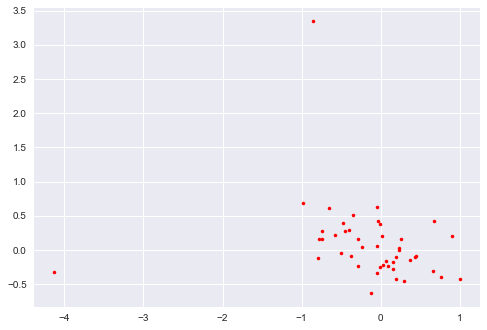

In [21]:
plt.plot(grouped_sparse_df.x_shift, grouped_sparse_df.y_shift, 'r.')
plt.show()

In [28]:
grouped_dense_df = dense_df.groupby('fname').agg({'x_shift': np.mean, 'y_shift': np.mean})

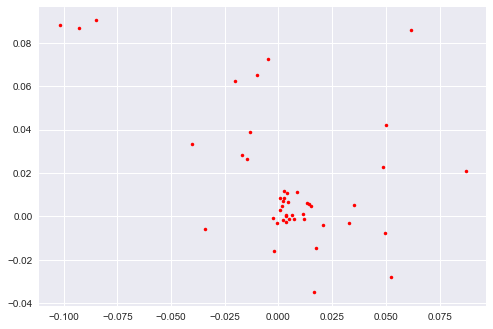

In [29]:
plt.plot(grouped_dense_df.x_shift, grouped_dense_df.y_shift, 'r.')
plt.show()